<a href="https://colab.research.google.com/github/Gowri-Rk/DeepLearningAssignments/blob/master/Ungraded%20Assignment%204/Ungraded_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Working with Tensors

## Exercises from chapter 2

In [0]:
import torch

In [189]:
torch.version.__version__


'1.5.0+cu101'

In [0]:
a = torch.ones(3,3)

In [0]:
b = torch.ones(3,3)

In [192]:
a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [193]:
a = a.to('cuda')
b = b.to('cuda')
a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')

In [194]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [0]:
from torchvision import models

In [0]:
p = torch.zeros(6)
p[0] = 1.0
p[1] = 4.0
p[2] = 2.0
p[3] = 1.0
p[4] = 3.0
p[5] = 5.0

In [197]:
p = torch.tensor([1.0, 4.0, 2.0, 1.0, 3.0, 5.0])
p

tensor([1., 4., 2., 1., 3., 5.])

In [198]:
float(p[0]), float(p[1])

(1.0, 4.0)

In [199]:
p = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
p

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [200]:
p.shape

torch.Size([3, 2])

In [201]:
torch.Size([3, 2])

torch.Size([3, 2])

In [202]:
p = torch.zeros(3, 2)
p

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [203]:
p = torch.FloatTensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
p

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [204]:
p[0, 1]


tensor(4.)

In [205]:
p[0]

tensor([1., 4.])

In [206]:
p = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
p.storage()

 1.0
 4.0
 2.0
 1.0
 3.0
 5.0
[torch.FloatStorage of size 6]

In [207]:
p_storage = p.storage()
p_storage[0]

1.0

In [208]:
p = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
p_storage = p.storage()
p_storage[0] = 2.0
p

tensor([[2., 4.],
        [2., 1.],
        [3., 5.]])

Size, storage offset, and strides


In [209]:
p = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
s_p = p[1]
s_p.storage_offset()

2

In [210]:
s_p.size()

torch.Size([2])

In [211]:
s_p.shape

torch.Size([2])

In [212]:
p.stride()

(2, 1)

In [213]:
p = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
sp = p[1]
sp[0] = 10.0
p

tensor([[ 1.,  4.],
        [10.,  1.],
        [ 3.,  5.]])

In [214]:
p = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 5.0]])
s_p = p[1].clone()
s_p[0] = 10.0
p

tensor([[1., 4.],
        [2., 1.],
        [3., 5.]])

In [215]:
#transpose
p_t = p.t()
p_t

tensor([[1., 2., 3.],
        [4., 1., 5.]])

In [216]:
#checking same storage
id(p.storage()) == id(p_t.storage())

True

transposing on multiple dimensions

In [217]:
some_tensor = torch.ones(3, 4, 5)
some_tensor_t = some_tensor.transpose(0, 2)
some_tensor.shape

torch.Size([3, 4, 5])

In [218]:
some_tensor_t.shape

torch.Size([5, 4, 3])

In [219]:
some_tensor.stride()

(20, 5, 1)

In [220]:
some_tensor_t.stride()

(1, 5, 20)

In [221]:
#contingous tensors
p.is_contiguous()

True

In [222]:
p_t.is_contiguous()

False

Tensors on GPU

In [0]:
p_gpu = torch.tensor([[1.0, 4.0], [2.0, 1.0], [3.0, 4.0]],
device='cuda')

In [0]:
p_gpu = p.to(device='cuda')

In [0]:
p_gpu = p.to(device='cuda:0')

In [0]:
p_cpu = p_gpu.to(device='cpu')

## Exercises from Chapter 3

In [227]:
import csv
from google.colab import  drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path = "/content/gdrive/My Drive/Colab Datasets/winequality-white.csv"


In [229]:
import numpy as np
np_wine = np.loadtxt(path, dtype=np.float32, delimiter=";",
skiprows=1)
np_wine

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [230]:
cols = next(csv.reader(open(path), delimiter=';'))
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [0]:
wine = torch.from_numpy(np_wine)

In [232]:
wine.shape, wine.type()

(torch.Size([4898, 12]), 'torch.FloatTensor')

In [233]:
data = wine[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]), torch.Size([4898, 11]))

In [234]:
t = wine[:, -1]
t, t.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

transforming tensors

In [235]:
t = wine[:, -1].long()
t

tensor([6, 6,  ..., 7, 6])

In [0]:
t_onehot = torch.zeros(t.shape[0], 10)

In [237]:
t_onehot.scatter_(1, t.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [238]:
t_unsqueezed = t.unsqueeze(1)
t_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [239]:
mean = torch.mean(data, dim=0)
mean

tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
        1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01])

In [240]:
var = torch.var(data, dim=0)
var

tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
        1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00])

In [241]:
norm = (data - mean) / torch.sqrt(var)
norm

tensor([[ 1.7209e-01, -8.1764e-02,  ..., -3.4914e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3467e-03, -8.2418e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6250e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])

In [242]:
bad_indexes = t <= 3 # <1>
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [243]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [244]:
bad_data = data[t <= 3]
mid_data = data[(t > 3) & (t < 7)] # <1>
good_data = data[t >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

for i, args in enumerate(zip(cols, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [245]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)

predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [246]:
actual_indexes = t > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [247]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()

n_matches, n_matches / n_predicted, n_matches / n_actual

(2018, 0.74000733406674, 0.6193984039287906)

## Excercises from Chapter 4

In [0]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [0]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [0]:
def model(t_u, w, b):
    return w * t_u + b

In [0]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [252]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [253]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

In [254]:

x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}, z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1]), z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


In [0]:
delta = 0.1

loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [0]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [0]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [0]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [0]:

def dmodel_dw(t_u, w, b):
    return t_u

In [0]:
def dmodel_db(t_u, w, b):
    return 1.0

In [0]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

In [0]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [264]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)


Epoch 1, Loss 1763.884644
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2969,   82.6000])
Epoch 2, Loss 5802485.500000
    Params: tensor([2568.4014,   45.1637])
    Grad:   tensor([-261257.4219,   -4598.9712])
Epoch 3, Loss 19408035840.000000
    Params: tensor([-148527.7344,   -2616.3933])
    Grad:   tensor([15109614.0000,   266155.7188])
...
Epoch 10, Loss 90901154706620645225508955521810432.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [265]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884644
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2969,   82.6000])
Epoch 2, Loss 323.090546
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4667,  16.5122])
...
Epoch 10, Loss 29.105242
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022669
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [0]:
t_un = 0.1 * t_u

In [267]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, # <1>
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574917
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030487
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941875
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [268]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574917
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030487
Epoch 11, Loss 28.941875
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

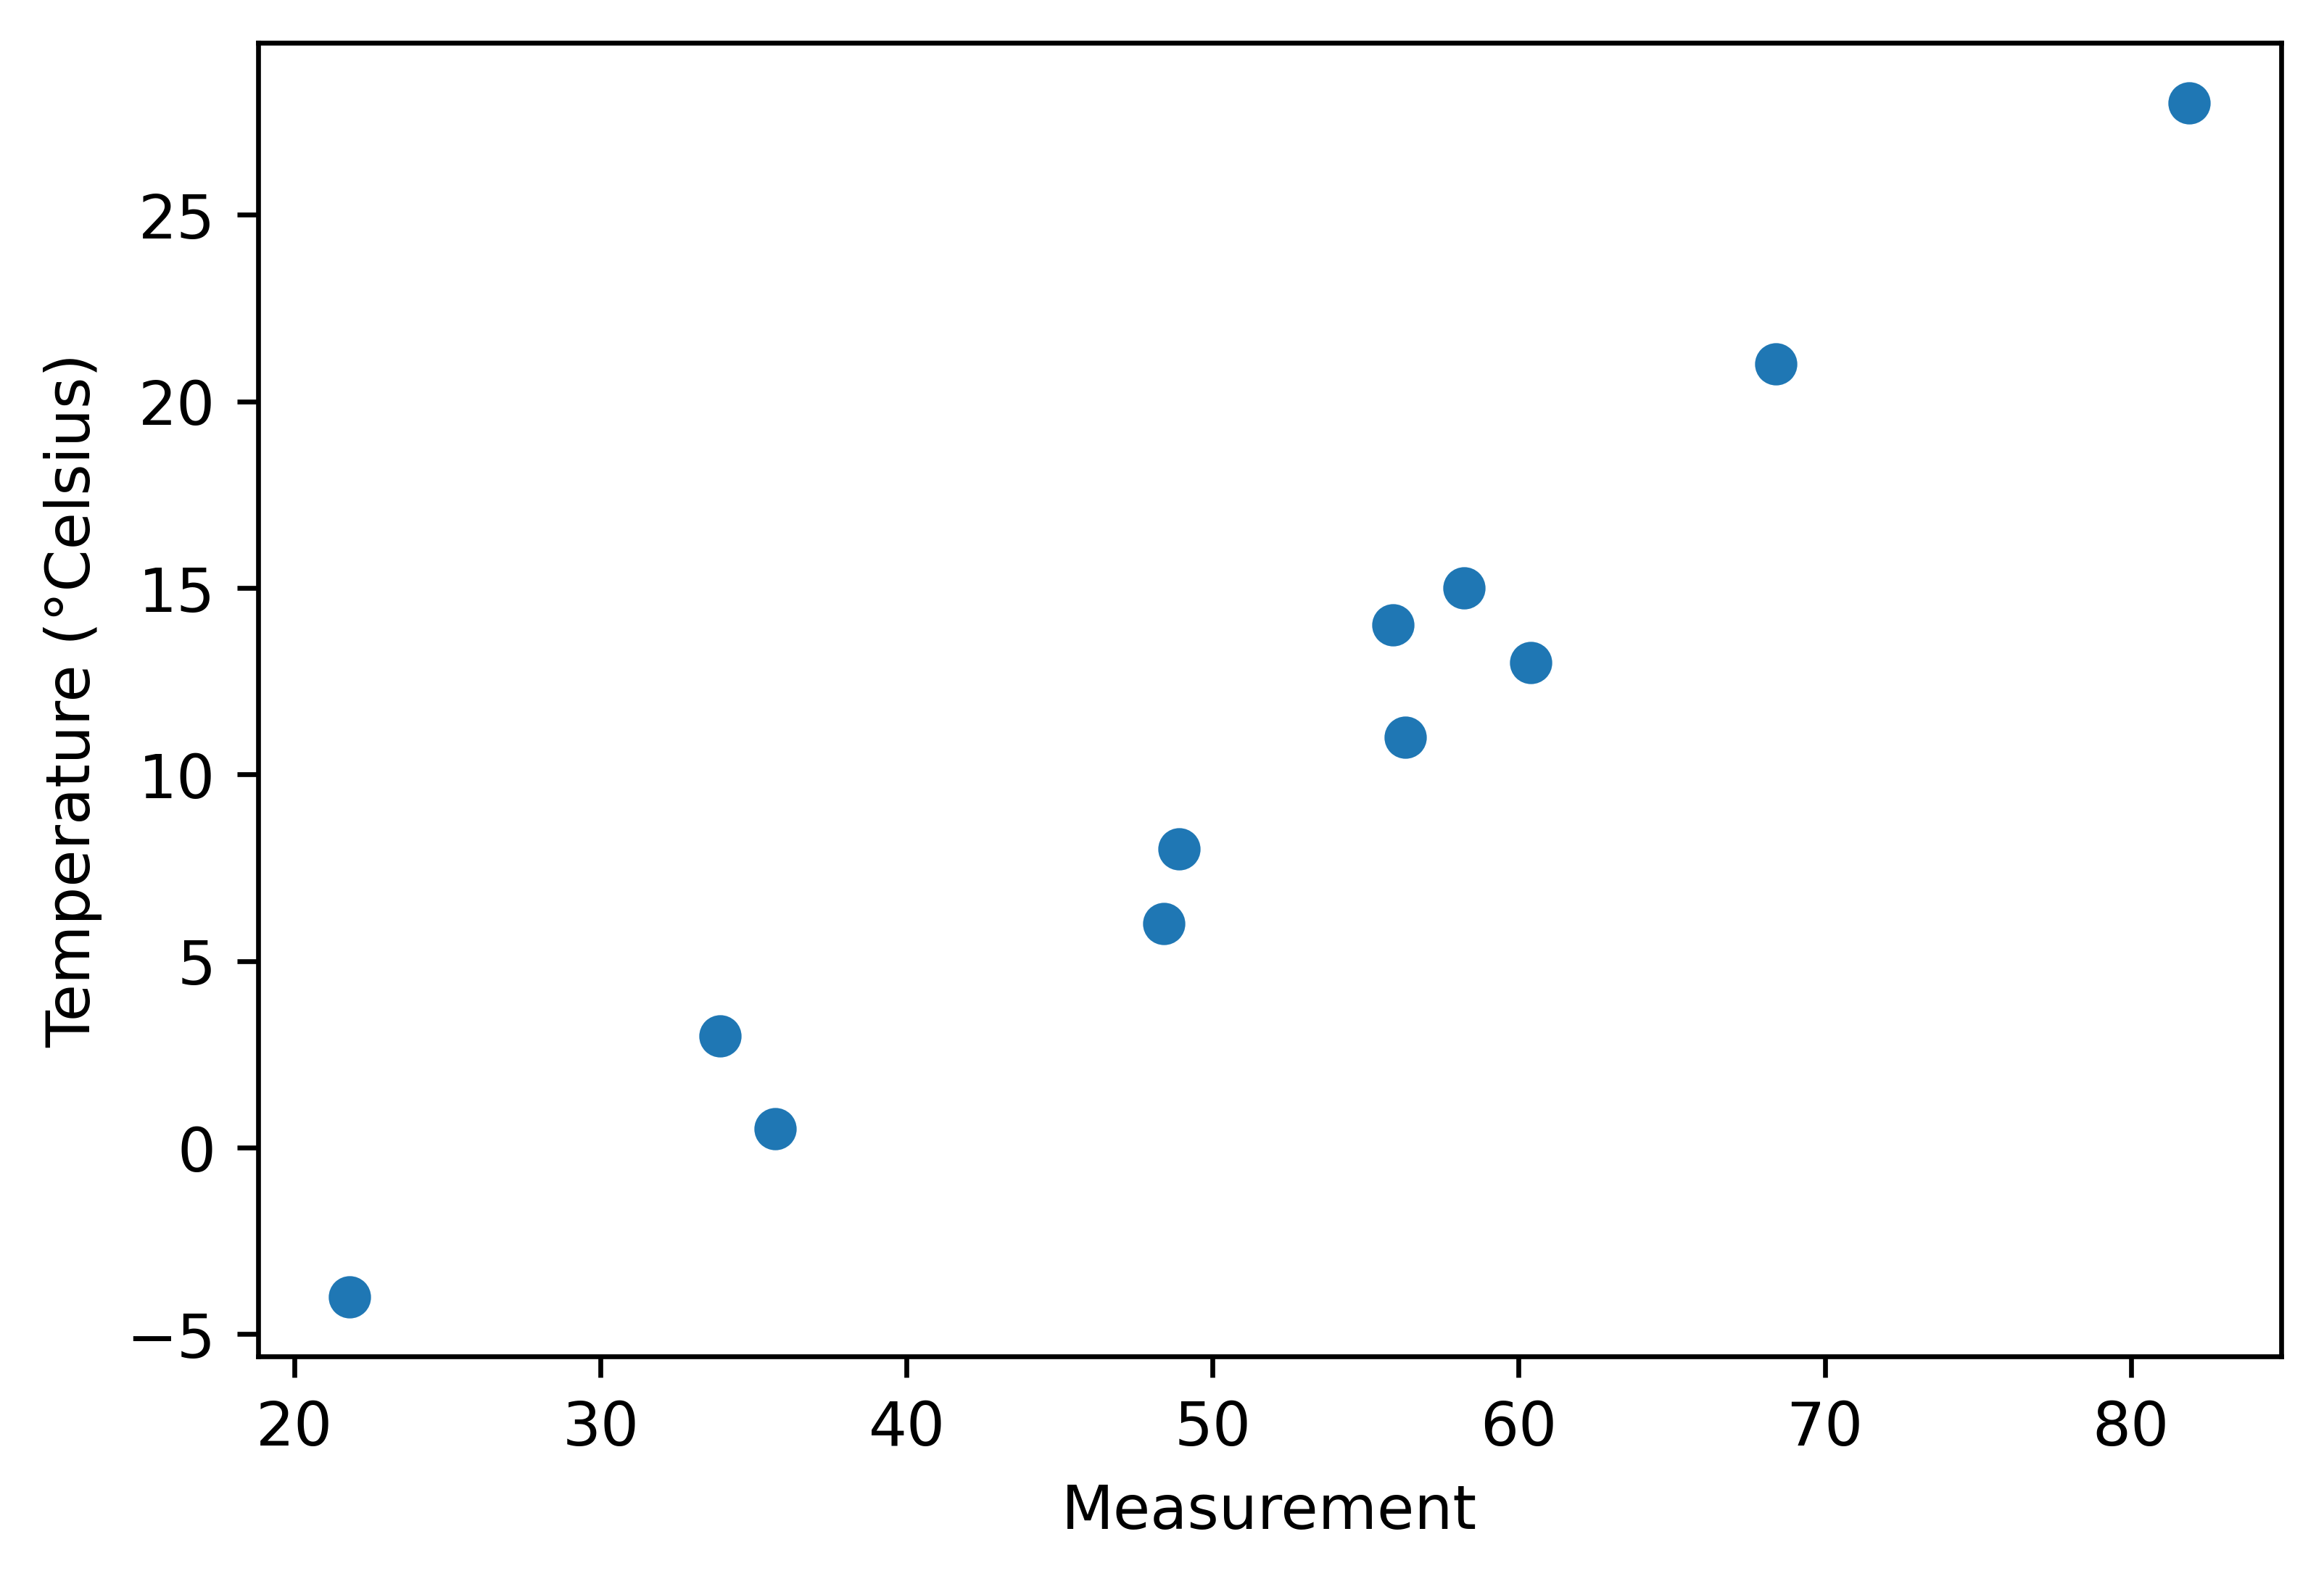

In [269]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Measurement")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

plt.savefig("temp_data_plot.png", format="png")